In [1607]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from datetime import datetime

import statsmodels.api as sm
import statsmodels.tsa.api as tsa

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_absolute_percentage_error, r2_score

import nevergrad as ng

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 1. EDA

**Read dataframes**

In [1608]:
df_week = pd.read_csv('input/data_weekly.csv')
df_week.head(5)

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,brand_knowledge,christmas_dummy,weather_index,investment_competition_1,investment_competition_2,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales
0,01.10.2020,9.813096e+05,0.0,236646.24270,0.0000,871248.6945,186,22777.0,64817.0000,0,0.724231,0,71.050000,4.469290e+06,1.646746e+07,29.957143,0.428392,0.439821,201740,28225189.15
1,08.10.2020,1.204436e+06,0.0,492336.78720,0.0000,780996.4369,186,22905.3,290340.0000,0,0.810316,0,54.744286,3.424972e+06,9.855486e+06,7.314286,0.396890,0.511645,201741,33173110.86
2,15.10.2020,1.321570e+06,0.0,291885.33780,0.0000,932173.8794,186,23328.8,824941.0000,0,0.778179,0,54.311429,1.502713e+07,1.812631e+07,9.500000,0.440410,0.394800,201742,30504393.42
3,22.10.2020,2.155215e+05,0.0,110500.83200,0.0000,683081.4701,186,23485.3,591291.0000,1,0.804275,0,68.302857,1.147109e+07,1.579170e+07,30.485714,0.404397,0.413794,201743,30335675.45
4,29.10.2020,9.799192e+04,0.0,58135.35929,175435.8015,539848.5232,186,23557.1,554888.8674,0,0.817915,0,63.864286,1.876094e+07,2.324122e+07,19.728571,0.500315,0.452294,201744,25670890.36


In [1609]:
df_week.tail(5)

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,brand_knowledge,christmas_dummy,weather_index,investment_competition_1,investment_competition_2,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales
112,24.11.2022,0.000,0.0,0.0,26600.5635,2.018774e+06,142,28175.0,17469024.98,0,0.709503,0,65.965714,8383346.483,22385049.65,19.100000,0.552689,0.471849,201948,23974410.26
113,01.12.2022,0.000,0.0,0.0,0.0000,9.954599e+05,142,28109.8,12131550.24,0,0.778967,0,67.607143,3788887.598,28046114.92,11.242857,0.501246,0.500979,201949,20884279.92
114,08.12.2022,0.000,0.0,0.0,0.0000,1.652220e+06,142,28290.7,20624785.51,0,0.721600,0,71.281429,5688529.991,27570241.08,13.071429,0.493944,0.444787,201950,21475590.81
115,15.12.2022,0.000,0.0,0.0,0.0000,9.946260e+05,142,28608.6,20449414.88,0,0.795736,0,63.042857,4501809.765,28072433.02,11.057143,0.524342,0.505004,201951,23863407.52
116,22.12.2022,1421815.694,0.0,0.0,0.0000,7.035735e+05,142,28701.7,11604843.10,3,0.711990,1,73.668571,1067903.548,22751932.87,23.228571,0.523796,0.505997,201952,15043045.07


In [1610]:
df_week.dtypes

Date                         object
investment_tv               float64
investment_radio            float64
investment_press            float64
investment_banners          float64
investment_online           float64
stores_opened                 int64
economy_index               float64
investment_competition      float64
public_holidays               int64
brand_knowledge             float64
christmas_dummy               int64
weather_index               float64
investment_competition_1    float64
investment_competition_2    float64
precipitation_index         float64
competitor_recognition_1    float64
competitor_recognition_2    float64
YearWeek                      int64
sales                       float64
dtype: object

In [1611]:
# check for NaN
df_week.isna().sum()

Date                        0
investment_tv               0
investment_radio            0
investment_press            0
investment_banners          0
investment_online           0
stores_opened               0
economy_index               0
investment_competition      0
public_holidays             0
brand_knowledge             0
christmas_dummy             0
weather_index               0
investment_competition_1    0
investment_competition_2    0
precipitation_index         0
competitor_recognition_1    0
competitor_recognition_2    0
YearWeek                    0
sales                       0
dtype: int64

In [1612]:
# Convert date into datetime
df_week['Date'] = pd.to_datetime(df_week['Date'], format='%d.%m.%Y')
df_week.head(3)

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,brand_knowledge,christmas_dummy,weather_index,investment_competition_1,investment_competition_2,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales
0,2020-10-01,981309.627,0.0,236646.2427,0.0,871248.6945,186,22777.0,64817.0,0,0.724231,0,71.050000,4.469290e+06,1.646746e+07,29.957143,0.428392,0.439821,201740,28225189.15
1,2020-10-08,1204435.829,0.0,492336.7872,0.0,780996.4369,186,22905.3,290340.0,0,0.810316,0,54.744286,3.424972e+06,9.855486e+06,7.314286,0.396890,0.511645,201741,33173110.86
2,2020-10-15,1321570.322,0.0,291885.3378,0.0,932173.8794,186,23328.8,824941.0,0,0.778179,0,54.311429,1.502713e+07,1.812631e+07,9.500000,0.440410,0.394800,201742,30504393.42


**Charts functions**

In [1613]:
def line_plot_secondary_axis_px(df, x_col_name, y1_col_name, y2_col_name):
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Scatter(x=df[x_col_name], y=df[y1_col_name], name=y1_col_name),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=df[x_col_name], y=df[y2_col_name], name=y2_col_name),
        secondary_y=True,
    )

    # Add figure title
    fig.update_layout(
        title_text=f'{y1_col_name} vs {y2_col_name}'
    )

    # Set x-axis title
    fig.update_xaxes(title_text=x_col_name)

    # Set y-axes titles
    fig.update_yaxes(title_text=f"<b> {y1_col_name} </b> ", secondary_y=False)
    fig.update_yaxes(title_text=f"<b> {y2_col_name} </b> ", secondary_y=True)

    # Set the size of the subplot
    fig.update_layout(height=600, width=1200)

    fig.show()

In [1614]:
def line_plot_px(df, x_col_name, y_col_name, x_label, y_label, title):

    fig = px.line(  df, 
                    x=x_col_name, 
                    y=y_col_name, 
                    height=600,
                    width=1200, 
                    title=title,
                    )

    fig.update_layout(  yaxis_title=y_label,
                        xaxis_title=x_label,
                        )
    fig.show()

In [1615]:
def scatter_polynomial(df, degree, x_col_name, y_col_name):

    # Scatter plot using Plotly Express
    fig = px.scatter(df, 
                    x=x_col_name, 
                    y=y_col_name,
                    height=600, 
                    width=1000, 
                    title=f'{y_col_name} vs {x_col_name}')

    # Polynomial fit
    coefficients = np.polyfit(df[x_col_name], df[y_col_name], degree)
    poly_fit = np.poly1d(coefficients)

    # Create trendline data
    x_fit = np.linspace(df[x_col_name].min(), df[x_col_name].max(), 100)
    y_fit = poly_fit(x_fit)

    # Add trendline to the figure
    fig.add_trace(go.Scatter(x=x_fit, y=y_fit, mode='lines', name=f'Polynomial fit - degree {degree}'))

    # Show the figure
    fig.show()

In [1616]:
def scatter_linear(df, x_col_name, y_col_name):
    fig = px.scatter(df,
                    x=x_col_name, 
                    y=y_col_name,
                    height=600, 
                    width=1200, 
                    title=f'{y_col_name} vs {x_col_name}',
                    trendline='ols',
                    trendline_color_override="red"
                    )
    fig.show()

**Line Charts**

In [1617]:
line_plot_px(df = df_week, 
             title = 'Sales',
             x_col_name = 'Date',
             y_col_name = ['sales'], 
             x_label = 'date-weeks', 
             y_label = 'money [CZK]'
             )

In [1618]:
line_plot_secondary_axis_px(df=df_week,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='stores_opened'
                            )

In [1619]:
line_plot_secondary_axis_px(df=df_week,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='christmas_dummy', 
                            )

In [1620]:
line_plot_px(df = df_week, 
             title = 'Kinds of investments',
             x_col_name = 'Date', 
             y_col_name = ['investment_tv', 'investment_radio', 'investment_press', 'investment_banners', 'investment_online'],
             x_label = 'date-weeks', 
             y_label = 'money [CZK]'
             )

In [1621]:
line_plot_secondary_axis_px(df=df_week,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='investment_tv', 
                            )

**Scatter charts - POLYNOMIAL regression**

In [1622]:
scatter_polynomial(df=df_week, 
                   x_col_name='weather_index', 
                   y_col_name='sales', 
                   degree=2
                   )

In [1623]:
scatter_polynomial(df=df_week, 
                   x_col_name='investment_tv', 
                   y_col_name='sales', 
                   degree=2
                   )

In [1624]:
scatter_polynomial(df=df_week, 
                   x_col_name='investment_radio', 
                   y_col_name='sales', 
                   degree=2
                   )

In [1625]:
scatter_polynomial(df=df_week, 
                   x_col_name='investment_banners', 
                   y_col_name='sales', 
                   degree=2
                   )

In [1626]:
scatter_polynomial(df=df_week, 
                   x_col_name='investment_press', 
                   y_col_name='sales', 
                   degree=2
                   )

In [1627]:
scatter_polynomial(df=df_week, 
                   x_col_name='investment_online', 
                   y_col_name='sales', 
                   degree=2
                   )

**Outliers - winsorize**

In [1628]:
fig = px.box(df_week, y='investment_online', width=400, height=600)
fig.show()

In [1629]:
# windsorize outliers value is lower and upper percentage when the outliers are replaced by the closest one

""" df_week['investment_online'] = winsorize(df_week['investment_online'], (0.01,0.01)) """

scatter_polynomial(df=df_week, 
                   x_col_name='investment_online', 
                   y_col_name='sales', 
                   degree=2
                   )

**EDA-conclusions**

In [1630]:
''' 
CONCLUSION:
    - Sales has decreasing trend - probably influenced by opened shops. Highest peaks in Automn (September, October)
    - The highest investments are in TV then in online sector and press.
    - Scatter plot 'Sales vs investment-TV' show that investments after certain point do not increase the sales!!!
    - Online investment shows some outliers (replacing them by neighbouring values by windsorizing led to the worse results on MAPE, 
    but we are more interested in coefficients and diminishing return so the outlier was got a value of the last biggest point,
    we can see how max point changed from 5 million investment to 1million which is more realistic)
    - TODO: update the conclusions on the base of new findings
'''

" \nCONCLUSION:\n    - Sales has decreasing trend - probably influenced by opened shops. Highest peaks in Automn (September, October)\n    - The highest investments are in TV then in online sector and press.\n    - Scatter plot 'Sales vs investment-TV' show that investments after certain point do not increase the sales!!!\n    - Online investment shows some outliers (replacing them by neighbouring values by windsorizing led to the worse results on MAPE, \n    but we are more interested in coefficients and diminishing return so the outlier was got a value of the last biggest point,\n    we can see how max point changed from 5 million investment to 1million which is more realistic)\n    - TODO: update the conclusions on the base of new findings\n"

# 2. Merging monthly data

In [1631]:
# read data
df_month = pd.read_csv('input/data_monthly.csv')
df_month.head(5)

,Date,unemployment,tourists,gdp,confidence
0,01.01.2020,5.290542,549816,1.408679,115.319086
1,01.02.2020,5.143808,561622,1.408679,113.495436
2,01.03.2020,4.789755,696325,1.408679,114.031803
3,01.04.2020,4.388351,867699,2.443518,113.709983
4,01.05.2020,4.117193,941760,2.443518,113.709983


In [1632]:
# Check types 
df_month.dtypes

Date             object
unemployment    float64
tourists          int64
gdp             float64
confidence      float64
dtype: object

In [1633]:
# Convert dates
df_month['Date'] = pd.to_datetime(df_month['Date'], format='%d.%m.%Y')
df_month.head(5)

,Date,unemployment,tourists,gdp,confidence
0,2020-01-01,5.290542,549816,1.408679,115.319086
1,2020-02-01,5.143808,561622,1.408679,113.495436
2,2020-03-01,4.789755,696325,1.408679,114.031803
3,2020-04-01,4.388351,867699,2.443518,113.709983
4,2020-05-01,4.117193,941760,2.443518,113.709983


In [1634]:
df_month.dtypes

Date            datetime64[ns]
unemployment           float64
tourists                 int64
gdp                    float64
confidence             float64
dtype: object

In [1635]:
# Get min and max dates from weekly data
min_date = df_week['Date'].min()
max_date = df_week['Date'].max()

print(min_date)
print(max_date)

2020-10-01 00:00:00
2022-12-22 00:00:00


In [1636]:
# Get a daily dates
daily_dates = pd.date_range(start=min_date, end=max_date, freq='D')

In [1637]:
# Create a daily df
df_day = pd.DataFrame({'Date': daily_dates})

In [1638]:
# Merge daily df with monthly df
df_day = pd.merge(df_day, df_month, on='Date', how='left').set_index('Date')
df_day.head(32)

,unemployment,tourists,gdp,confidence
Date,,,,
2020-10-01,3.601064,926941.0,0.635931,114.031803
2020-10-02,NaN,NaN,NaN,NaN
2020-10-03,NaN,NaN,NaN,NaN
2020-10-04,NaN,NaN,NaN,NaN
2020-10-05,NaN,NaN,NaN,NaN
2020-10-06,NaN,NaN,NaN,NaN
2020-10-07,NaN,NaN,NaN,NaN
2020-10-08,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN


In [1639]:
# Interpolate between months
df_day = df_day[['unemployment', 'tourists', 'gdp', 'confidence']].interpolate().reset_index()
df_day.head(32)

,Date,unemployment,tourists,gdp,confidence
0,2020-10-01,3.601064,926941.000000,0.635931,114.031803
1,2020-10-02,3.597804,919126.741935,0.635931,114.083710
2,2020-10-03,3.594544,911312.483871,0.635931,114.135617
3,2020-10-04,3.591284,903498.225806,0.635931,114.187523
4,2020-10-05,3.588024,895683.967742,0.635931,114.239430
5,2020-10-06,3.584764,887869.709677,0.635931,114.291336
6,2020-10-07,3.581504,880055.451613,0.635931,114.343243
7,2020-10-08,3.578243,872241.193548,0.635931,114.395149
8,2020-10-09,3.574983,864426.935484,0.635931,114.447056
9,2020-10-10,3.571723,856612.677419,0.635931,114.498963


In [1640]:
# Merge day df with weekly df
df = pd.merge(df_week, df_day, on='Date', how='left')
df

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,...,investment_competition_2,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales,unemployment,tourists,gdp,confidence
0,2020-10-01,9.813096e+05,0.0,236646.24270,0.0000,8.712487e+05,186,22777.0,6.481700e+04,0,...,1.646746e+07,29.957143,0.428392,0.439821,201740,28225189.15,3.601064,926941.000000,0.635931,114.031803
1,2020-10-08,1.204436e+06,0.0,492336.78720,0.0000,7.809964e+05,186,22905.3,2.903400e+05,0,...,9.855486e+06,7.314286,0.396890,0.511645,201741,33173110.86,3.578243,872241.193548,0.635931,114.395149
2,2020-10-15,1.321570e+06,0.0,291885.33780,0.0000,9.321739e+05,186,23328.8,8.249410e+05,0,...,1.812631e+07,9.500000,0.440410,0.394800,201742,30504393.42,3.555422,817541.387097,0.635931,114.758495
3,2020-10-22,2.155215e+05,0.0,110500.83200,0.0000,6.830815e+05,186,23485.3,5.912910e+05,1,...,1.579170e+07,30.485714,0.404397,0.413794,201743,30335675.45,3.532601,762841.580645,0.635931,115.121841
4,2020-10-29,9.799192e+04,0.0,58135.35929,175435.8015,5.398485e+05,186,23557.1,5.548889e+05,0,...,2.324122e+07,19.728571,0.500315,0.452294,201744,25670890.36,3.509780,708141.774194,0.635931,115.485187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2022-11-24,0.000000e+00,0.0,0.00000,26600.5635,2.018774e+06,142,28175.0,1.746902e+07,0,...,2.238505e+07,19.100000,0.552689,0.471849,201948,23974410.26,2.803849,837624.600000,0.330304,109.254554
113,2022-12-01,0.000000e+00,0.0,0.00000,0.0000,9.954599e+05,142,28109.8,1.213155e+07,0,...,2.804611e+07,11.242857,0.501246,0.500979,201949,20884279.92,2.868371,862462.000000,0.330304,109.955408
114,2022-12-08,0.000000e+00,0.0,0.00000,0.0000,1.652220e+06,142,28290.7,2.062479e+07,0,...,2.757024e+07,13.071429,0.493944,0.444787,201950,21475590.81,2.868371,862462.000000,0.330304,109.955408
115,2022-12-15,0.000000e+00,0.0,0.00000,0.0000,9.946260e+05,142,28608.6,2.044941e+07,0,...,2.807243e+07,11.057143,0.524342,0.505004,201951,23863407.52,2.868371,862462.000000,0.330304,109.955408


In [1641]:
# Check for NaN
df.isna().sum()

Date                        0
investment_tv               0
investment_radio            0
investment_press            0
investment_banners          0
investment_online           0
stores_opened               0
economy_index               0
investment_competition      0
public_holidays             0
brand_knowledge             0
christmas_dummy             0
weather_index               0
investment_competition_1    0
investment_competition_2    0
precipitation_index         0
competitor_recognition_1    0
competitor_recognition_2    0
YearWeek                    0
sales                       0
unemployment                0
tourists                    0
gdp                         0
confidence                  0
dtype: int64

**Customers vs GDP vs Unemploynment**

In [1642]:
line_plot_secondary_axis_px(df=df,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='gdp', 

                            )

In [1643]:
line_plot_secondary_axis_px(df=df,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='unemployment'
                            )

**Conclusion: Merging data**

In [1644]:
'''

From the charts above is possible to see that customers were influenced by unemploynment as well as GDP (both GDP and unemploynment are quite dependent on each other)!!!

'''

'\n\nFrom the charts above is possible to see that customers were influenced by unemploynment as well as GDP (both GDP and unemploynment are quite dependent on each other)!!!\n\n'

# 3. Pre-selection features

**Pearson correlation**

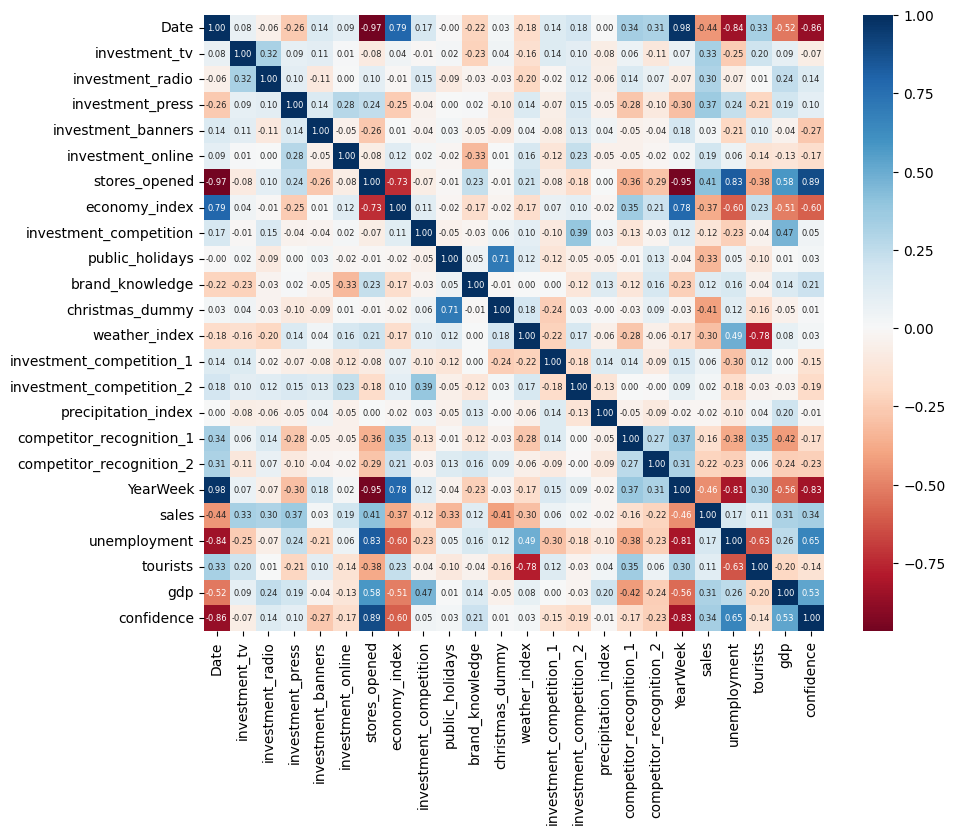

In [1645]:
# Heatmap
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(), 
            cmap='RdBu', 
            center=0, 
            annot_kws={"size":6}, 
            annot=True, 
            fmt=".2f")

plt.show()

In [1646]:
def correlation_heatmap_single_col(df, col_name):
    plt.figure(figsize=(6, 8))
    heatmap = sns.heatmap(df.corr()[[col_name]]
                        .sort_values(by=col_name, ascending=False), 
                        vmin=-1, vmax=1, 
                        annot=True,
                        cmap='RdBu')

    heatmap.set_title(f'Features Correlating with {col_name}', fontdict={'fontsize':18}, pad=16)

    plt.show()

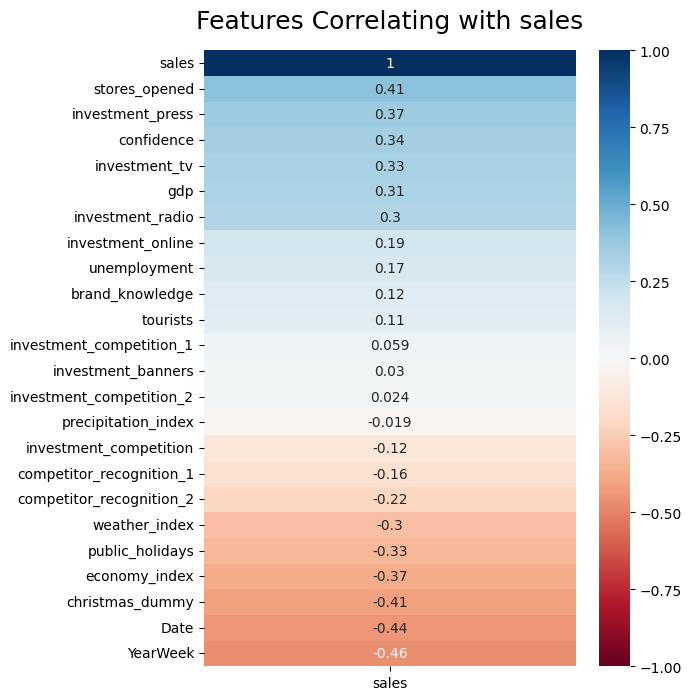

In [1647]:
correlation_heatmap_single_col(df=df, col_name='sales')

**Select features**

In [1648]:
# define cols for analysis
input_cols =[   'sales',
                'stores_opened',
                'investment_press',
                'confidence', 
                'investment_tv', 
                'gdp',
                'investment_radio', 
                'investment_online',
                'unemployment',
                'brand_knowledge',
                'investment_competition_1',
                'investment_banners', 
                #'tourists',
                #'investment_competition',
                #'investment_competition_2',
                #'competitor_recognition_1',
                #'competitor_recognition_2',
                #'precipitation_index',
                'weather_index',
                'public_holidays',
                'economy_index',
                'christmas_dummy'
                ]


**Conclusion: Pre-select features**

In [1649]:
''' 
TODO: write conclusion

'''

' \nTODO: write conclusion\n\n'

# 4. Scale

In [1650]:
# Scale the features in CZK 
invest_cols = ['investment_tv',	
               'investment_radio',	
               'investment_press',	
               'investment_banners',
               'investment_online',
               'investment_competition',
               'investment_competition_1',
               'investment_competition_2',
               'sales'
               ]

df[invest_cols] = df[invest_cols]/1000
df.head(2)

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,...,investment_competition_2,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales,unemployment,tourists,gdp,confidence
0,2020-10-01,981.309627,0.0,236.646243,0.0,871.248694,186,22777.0,64.817,0,...,16467.460920,29.957143,0.428392,0.439821,201740,28225.18915,3.601064,926941.000000,0.635931,114.031803
1,2020-10-08,1204.435829,0.0,492.336787,0.0,780.996437,186,22905.3,290.340,0,...,9855.485516,7.314286,0.396890,0.511645,201741,33173.11086,3.578243,872241.193548,0.635931,114.395149


In [1651]:
'''
CONCLUSION:

If I scale the data the coefficients will be scaled as well -> must be taken into account when interpereting the coefficients. 
I scaled only features in CZK - better interpretation but the values will be in thousands of CZK - must be considered in during interpretation!!!

'''

'\nCONCLUSION:\n\nIf I scale the data the coefficients will be scaled as well -> must be taken into account when interpereting the coefficients. \nI scaled only features in CZK - better interpretation but the values will be in thousands of CZK - must be considered in during interpretation!!!\n\n'

# 5. Prepare dataset

In [1652]:
# Define true values of 'sales'
y = df[['sales']].copy()

# Copy selected variables
X = df[input_cols].drop(columns='sales').copy()

# Add unit vector (interception in line equation)
X['unit vector'] = 1


# 6. DM - Diminishing Return

In [1653]:
''' 
I moved the diminishing return chapter below.

'''

' \nI moved the diminishing return chapter below.\n\n'

# 7. Build model - OLS

In [1654]:
""" # Calculate coefficients using OLS: gamma = (X^T · X)^-1 · X^T · y
def coeff_fn(X, y):
    XTX_inv = np.linalg.inv(X.T.dot(X))
    XTy = X.T.dot(y)
    gamma = XTX_inv.dot(XTy)
    return gamma

# Call the function
gamma = coeff_fn(X, y) # alternative: coefficients = model.params """

' # Calculate coefficients using OLS: gamma = (X^T · X)^-1 · X^T · y\ndef coeff_fn(X, y):\n    XTX_inv = np.linalg.inv(X.T.dot(X))\n    XTy = X.T.dot(y)\n    gamma = XTX_inv.dot(XTy)\n    return gamma\n\n# Call the function\ngamma = coeff_fn(X, y) # alternative: coefficients = model.params '

In [1655]:
# Calculate coefficients:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     18.41
Date:                Sat, 18 May 2024   Prob (F-statistic):           1.76e-22
Time:                        19:54:45   Log-Likelihood:                -1009.8
No. Observations:                 117   AIC:                             2052.
Df Residuals:                     101   BIC:                             2096.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
stores_opened           

**Multicolinearity-VIF**

In [1656]:
# Compute the vif for all given features - values around 1 are considered Ok
def compute_vif(df):  
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [1657]:
# Compute VIF 
compute_vif(X).sort_values('VIF', ascending=False)

,Variable,VIF
15,unit vector,5796.129166
0,stores_opened,24.741500
7,unemployment,9.950902
2,confidence,7.902236
13,economy_index,2.573216
4,gdp,2.508221
14,christmas_dummy,2.321622
12,public_holidays,2.142561
11,weather_index,1.885258
9,investment_competition_1,1.609376


**Multicolinerity - Corellation Matrix**

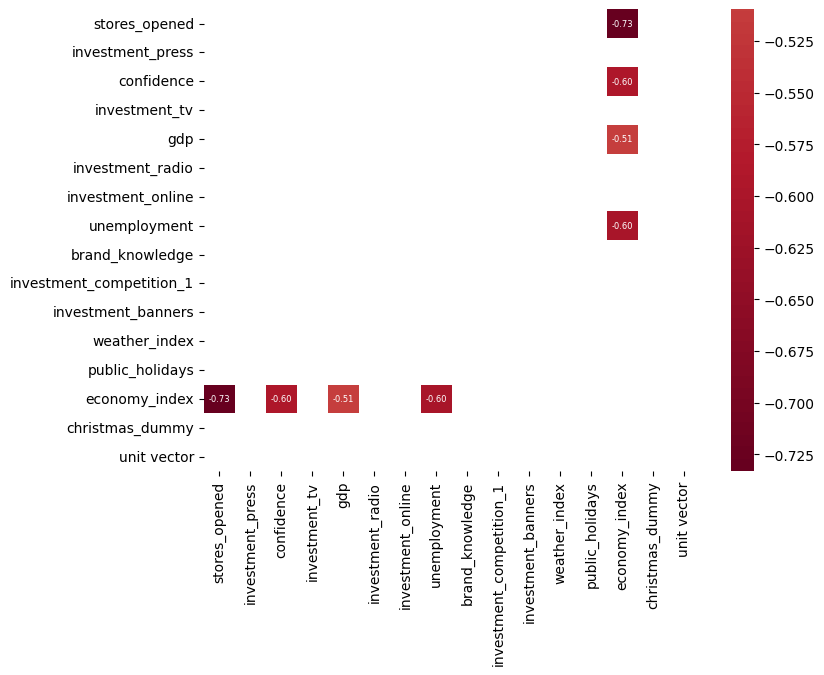

In [1658]:
# Check for NEGATIVE high correlations
mask = X.corr() >= -0.5

plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), 
            cmap='RdBu', 
            center=0, 
            annot_kws={"size":6}, 
            annot=True, 
            fmt=".2f",
            mask=mask)

plt.show()

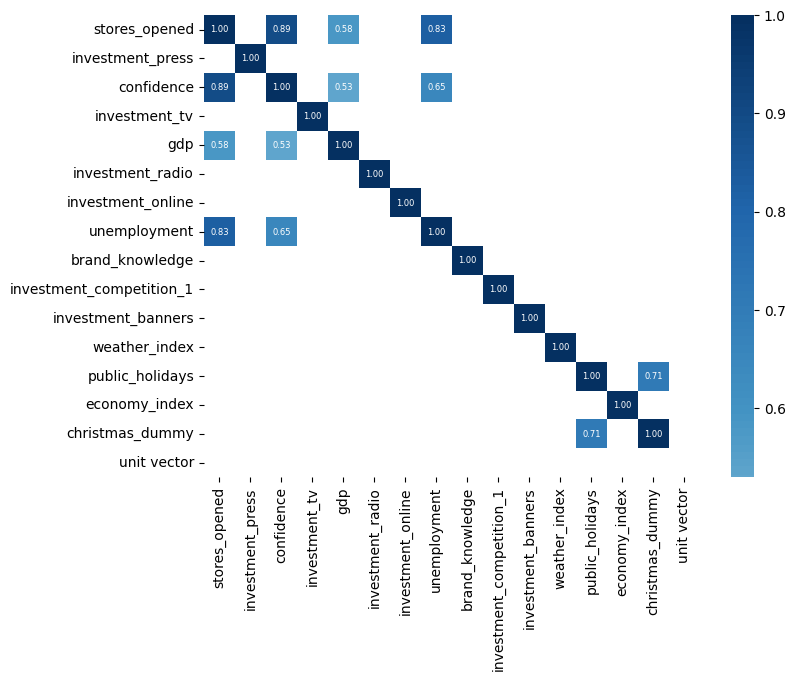

In [1659]:
# Check for POSITIVE high correlations
mask = X.corr() <= 0.5

plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), 
            cmap='RdBu', 
            center=0, 
            annot_kws={"size":6}, 
            annot=True, 
            fmt=".2f",
            mask=mask)

plt.show()

**Multicolinearity - centering the continuous variables**

In [1660]:
""" # Centering helps to improve multicolinearity = better interpretation, coeff unchanged if they are not divided by std

# Define continuous varianles
cols_cont =      [  'investment_tv', 
                    'investment_radio', 
                    'investment_press', 
                    'investment_banners', 
                    'investment_online']

# Centerize continuous variables
for col in cols_cont:
    mean = X[col].mean()
    X[col] = X[col] - mean

# Run OLS
model = sm.OLS(y, X).fit()

# Compute vif 
vif = compute_vif(X).sort_values('VIF', ascending=False)

print(model.summary())
print(vif) """

" # Centering helps to improve multicolinearity = better interpretation, coeff unchanged if they are not divided by std\n\n# Define continuous varianles\ncols_cont =      [  'investment_tv', \n                    'investment_radio', \n                    'investment_press', \n                    'investment_banners', \n                    'investment_online']\n\n# Centerize continuous variables\nfor col in cols_cont:\n    mean = X[col].mean()\n    X[col] = X[col] - mean\n\n# Run OLS\nmodel = sm.OLS(y, X).fit()\n\n# Compute vif \nvif = compute_vif(X).sort_values('VIF', ascending=False)\n\nprint(model.summary())\nprint(vif) "

**Run again without some features causing multicolinearity**

In [1661]:
# Drop some features to get the better F-value (statisticall significance) 
X = X.drop(columns=([ 
                     'unemployment', 
                     'public_holidays',
                     'economy_index',
                     'gdp',
                     'confidence',
                     'investment_competition_1',
                     'investment_radio',
                     ]))

# Run OLS
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     31.37
Date:                Sat, 18 May 2024   Prob (F-statistic):           6.99e-25
Time:                        19:54:45   Log-Likelihood:                -1016.7
No. Observations:                 117   AIC:                             2051.
Df Residuals:                     108   BIC:                             2076.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
stores_opened         77.3181      9

In [1662]:
# Compute VIF 
compute_vif(X).sort_values('VIF', ascending=False)

,Variable,VIF
8,unit vector,581.300829
0,stores_opened,1.329975
3,investment_online,1.316339
1,investment_press,1.296054
4,brand_knowledge,1.255052
5,investment_banners,1.187192
6,weather_index,1.180723
2,investment_tv,1.125805
7,christmas_dummy,1.068744


In [1663]:
''' 
CONCLUSION:
    - from the correlation matrix is possible to see the multicolinearity between the features: 
        - 'stores opened' and 'economy_index' 
            ---> dropped 'economy_index' because of lower correlation with 'sales'

        - 'christmas_dummy' and 'public_holidays' 
            ---> 'public_holidays' dropped because of lower correlation with 'sales'

        - 'stores opened' and 'confidence', 'gdp', 'unemploynment', 'confidence'
            ---> dropped all of them because of lower correlation with 'sales'

    - further were dropped other features which werent statistically significant P-value > 0.05
        
    - after dropping features with high corerelation the VIF has improved for all remaining features and R2 score adjuste did not change significantelly 
    and Cond. No. (expressing multicolinearity) has decreased as well 

    - feature 'investment_radio' was dropped as well is it has high P-value and just 4 data points which is not enough 
    (also after dropping the radio the coeff for online investment  and press investment has increased which makes more sense in terms of fashion industry)
'''

" \nCONCLUSION:\n    - from the correlation matrix is possible to see the multicolinearity between the features: \n        - 'stores opened' and 'economy_index' \n            ---> dropped 'economy_index' because of lower correlation with 'sales'\n\n        - 'christmas_dummy' and 'public_holidays' \n            ---> 'public_holidays' dropped because of lower correlation with 'sales'\n\n        - 'stores opened' and 'confidence', 'gdp', 'unemploynment', 'confidence'\n            ---> dropped all of them because of lower correlation with 'sales'\n\n    - further were dropped other features which werent statistically significant P-value > 0.05\n        \n    - after dropping features with high corerelation the VIF has improved for all remaining features and R2 score adjuste did not change significantelly \n    and Cond. No. (expressing multicolinearity) has decreased as well \n\n    - feature 'investment_radio' was dropped as well is it has high P-value and just 4 data points which is not

# add 6. DR - Diminishing return

**Add quadratic elements to the investments features**

In [1664]:
# Define the function
def add_squared_columns(df, columns_list):
    for col in columns_list:
        new_col_name = f"{col}_sqrt"
        df[new_col_name] = df[col]**2
    return df

In [1665]:
# Define the features with square element
columns_to_square = ['investment_press', 
                     'investment_tv', 
                     'investment_online', 
                     #'investment_radio', 
                     'investment_banners'
                    ]

X_dr = X.copy()
X_dr = add_squared_columns(X_dr, columns_to_square).copy()
X_dr.head(2)

,stores_opened,investment_press,investment_tv,investment_online,brand_knowledge,investment_banners,weather_index,christmas_dummy,unit vector,investment_press_sqrt,investment_tv_sqrt,investment_online_sqrt,investment_banners_sqrt
0,186,236.646243,981.309627,871.248694,0.724231,0.0,71.050000,0,1,56001.444184,9.629686e+05,759074.287668,0.0
1,186,492.336787,1204.435829,780.996437,0.810316,0.0,54.744286,0,1,242395.512030,1.450666e+06,609955.434450,0.0


**Run OLS with DM**

In [1666]:
# Run OLS
model_dr = sm.OLS(y, X_dr).fit()
y_pred_dr = model_dr.predict(X_dr)
print(model_dr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     25.75
Date:                Sat, 18 May 2024   Prob (F-statistic):           7.25e-26
Time:                        19:54:46   Log-Likelihood:                -1006.2
No. Observations:                 117   AIC:                             2038.
Df Residuals:                     104   BIC:                             2074.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
stores_opened             

# Interpret Coefficients

In [1667]:
''' 
CONCLUSION:

- running OLS with qudratic elements (DR) has changed P-values for a few features - I decided not to drop these because I need some for calculating the efficiency

- during the coeff verification we expect that other values will stay unchanged = 'ceteris paribus'

        - if 1 store is opened it will increase the sales by ≈ 90*1000 = 90.000 CZK, 'ceteris paribus' 
                --> economic interpretation and verification of the coeff. is OK

        - if 'brand knowledge' is increased by 0.1 the sales rises up to 0.9 mil CZK, 'ceteris paribus' 
                --> economic interpretation and verification of the coeff. is OK

        - if 'weather index' is increased by 10 the sales drops by 1 mil CZK, 'ceteris paribus' 
                --> economic interpretation and verification of the coeff. is OK

        - if Christmas Eve is = 1 then the sales drops by 5.4 mil CZK, 'ceteris paribus', 
                --> (all stores are closed) economic interpretation and verification of the coeff. is OK

        - 'interception-unit vector' if all values are zero then the sales is 6.3 millions, which is hard to believe :-(
                --> probably there is a explanation for that - but I don't know about it :-(


        - for investments in channels we will neglect quadratic elements as they are very low (apart from banners):

                - if one thousand (1k) is invested in TV commercial, then sales is increased by 1.65*1*1000 ≈ 1650 CZK, 'ceteris paribus' 
                        --> economic interpretation and verification of the coeff. is OK

                - if one thousand (1k) is invested in PRESS commercial, then sales is increased by 4.43*1*1000 ≈ 4430 CZK, 'ceteris paribus' 
                        --> economic interpretation and verification of the coeff. is OK

                - if one thousand (1k) is invested in ONLINE commercial, then sales is increased by 3.52*1*1000 ≈ 3520 CZK, 'ceteris paribus' 
                        --> economic interpretation and verification of the coeff. is OK

                - in terms of BANNERS - quadratic function has convex shape - it means that after certain initial investments (local minimum=first derivation is zero) the sales starts increasing 
                        --> economic interpretation and verification of the coeff. is OK

I decided to drop ra                    


'''

" \nCONCLUSION:\n\n- running OLS with qudratic elements (DR) has changed P-values for a few features - I decided not to drop these because I need some for calculating the efficiency\n\n- during the coeff verification we expect that other values will stay unchanged = 'ceteris paribus'\n\n        - if 1 store is opened it will increase the sales by ≈ 90*1000 = 90.000 CZK, 'ceteris paribus' \n                --> economic interpretation and verification of the coeff. is OK\n\n        - if 'brand knowledge' is increased by 0.1 the sales rises up to 0.9 mil CZK, 'ceteris paribus' \n                --> economic interpretation and verification of the coeff. is OK\n\n        - if 'weather index' is increased by 10 the sales drops by 1 mil CZK, 'ceteris paribus' \n                --> economic interpretation and verification of the coeff. is OK\n\n        - if Christmas Eve is = 1 then the sales drops by 5.4 mil CZK, 'ceteris paribus', \n                --> (all stores are closed) economic interp

# 9. Validation

**Plot the chart**

In [1668]:
# Add base prediction without DR
df_results=pd.DataFrame()

df_results['sales'] = y
df_results['sales_pred'] = y_pred
df_results['sales_pred_dr'] = y_pred_dr

In [1669]:
# Plot the chart
fig = px.line(df_results,
              y=['sales', 'sales_pred', 'sales_pred_dr'], 
              title='True vs predicted sales with and without DR',
              height=700,
              width=1200
              )
fig.show()

**Calculate MAPE**

In [1670]:
def mape(y, y_pred):
    mape = (mean_absolute_percentage_error(np.array(y), np.array(y_pred)) * 100).round(2)
    print (f'MAPE: {mape} %')

In [1671]:
# Without DR
mape(y=y,
     y_pred=y_pred
     )

# With DR
mape(y=y,
     y_pred=y_pred_dr
     )

MAPE: 4.63 %
MAPE: 4.18 %


**Calculate R^2(adjusted) = corrected goodness-of-fit**

In [1672]:
def r2_adj(model):
    r2_adj = model.rsquared_adj.round(2)*100
    print (f'R2-adj: {r2_adj} %')

In [1673]:
r2_adj(model)
r2_adj(model_dr)

R2-adj: 68.0 %
R2-adj: 72.0 %


**Heterosquedasticity x Homosquedasticity check**

In [1674]:
def standartize_residuals(model):
    
    # Center the residuals
    res = np.array(model.resid)
    res_cent = res - np.mean(res)

    # Standardize the residuals
    res_std = res_cent / np.std(res)
    return res_std

In [1675]:
# Add a column with std values
df_results['res_std_dr'] = standartize_residuals(model_dr)

In [1676]:
# Plot the chart
fig = px.scatter(df_results,
                 y='res_std_dr',
                 x='sales_pred_dr',
                 width=1000,
                 height=600
                 )

# Add a horizontal line at y=0
fig.add_hline(y=0, line_dash="dot", line_color="red")
fig.show()

**Mathematical verification**

In [1677]:
def maths_verification(model, X, y):

    # Calculate the averages
    cols_mean_sqrt = np.array(X.mean().tolist())

    # Retreive the coeffs
    coeff_sqrt = np.array(model.params)

    # Retreive residuals and make average
    res_mean_sqrt = model.resid.mean()

    # Right side of the equation
    right = (np.dot(cols_mean_sqrt, coeff_sqrt) + res_mean_sqrt).round(2)

    # Left side of the equation
    left = y.mean().values[0].round(2)

    print(f'RIGHT side of the equation: {right}')
    print(f'LEFT side of the equation: {left}')


In [1678]:
maths_verification(model_dr, X_dr, y)

RIGHT side of the equation: 24716.29
LEFT side of the equation: 24716.29


**Conclusion: Verification**

In [1679]:
#TODO: sum it up

# 11. Compare efficiency

**Calculate the diminishing point for diffrent channels**

In [1680]:
# Create df
df_invest = pd.DataFrame({'coeff': model_dr.params})

# Get the column names I want to keep
investment_cols = [index for index in df_invest.index if index.startswith('investment')]  

df_invest = df_invest.loc[investment_cols]
df_invest

,coeff
investment_press,4.435878
investment_tv,1.654104
investment_online,3.512825
investment_banners,-1.110163
investment_press_sqrt,-0.003613
investment_tv_sqrt,-0.000382
investment_online_sqrt,-0.000446
investment_banners_sqrt,0.013847


In [1681]:
df_invest_new = pd.DataFrame()

df_invest_new['beta-1'] = df_invest.head(4)

col2 = np.array(df_invest.tail(4))

df_invest_new['beta-2'] = col2

df_invest_new

,beta-1,beta-2
investment_press,4.435878,-0.003613
investment_tv,1.654104,-0.000382
investment_online,3.512825,-0.000446
investment_banners,-1.110163,0.013847


In [1682]:
# Calculate Diminishing points 

# first derivation: dy/dx1 = (beta1*x1 + beta2*x1^2)/dx => x = beta1/(-2*beta2)
# second derivation: dy^2/dx1^2 => 2*beta2 

    # if beta2>0 - there is no diminishing point as the function is CONVEX
    # if beta2<0 - there is diminishing point as the function is CONCAVE

df_invest_new['dim_point'] = df_invest_new['beta-1']/(-2*df_invest_new['beta-2'])
df_invest_new

,beta-1,beta-2,dim_point
investment_press,4.435878,-0.003613,613.847661
investment_tv,1.654104,-0.000382,2167.713949
investment_online,3.512825,-0.000446,3940.505276
investment_banners,-1.110163,0.013847,40.086474


In [1683]:
# Calculate max sales for Diminishing point
df_invest_new['max_sales'] = df_invest_new['beta-1']*df_invest_new['dim_point'] + df_invest_new['beta-2']*df_invest_new['dim_point']**2
df_invest_new

,beta-1,beta-2,dim_point,max_sales
investment_press,4.435878,-0.003613,613.847661,1361.476622
investment_tv,1.654104,-0.000382,2167.713949,1792.812383
investment_online,3.512825,-0.000446,3940.505276,6921.152796
investment_banners,-1.110163,0.013847,40.086474,-22.251262


**Compute the efficiency for each channel**

In [1684]:
# ROI = (Profit - max_investment)/max_investment
df_invest_new['efficiency'] = (((df_invest_new['max_sales'] - df_invest_new['dim_point'])/df_invest_new['dim_point'])*100).round(2)
df_invest_new

,beta-1,beta-2,dim_point,max_sales,efficiency
investment_press,4.435878,-0.003613,613.847661,1361.476622,121.79
investment_tv,1.654104,-0.000382,2167.713949,1792.812383,-17.29
investment_online,3.512825,-0.000446,3940.505276,6921.152796,75.64
investment_banners,-1.110163,0.013847,40.086474,-22.251262,-155.51


**Conclusion Efficiency**

In [ ]:
''' 
First derivattive gave me the information about the diminishing point.

Second derivattive gave me information if the function is Convex Or Concave (all functions were Concave apart for banner which is Convex).

Efficiency was calculated for max investment which is diminishig point the best is investment in press 120% and investment online 75%.

Efficiency for banners is negative which makes sense because the function is convex and I nedd to invest at the beginning 40K which makes my sales worse 
but from this point sales starts goes up.

Very interesting is result for investments into TV because efficiency is negative - which is probably cause that it is very expensive and the sales generated is not woth it. 

'''

# 12. Marketing Mix - Diminishing return and Adstock

**Calculate Adstock**

In [1685]:
# Copy variables
X_base = X.copy()

# Copy true values of 'sales'
y_base = y.copy()


In [1686]:
'''

Adstock: A(t) = x(t) + A(t-1)*beta

Diminishing return: DR = A(t)^alfa

'''

# Function for Adstocked variables
def adstock(x, beta):
    return tsa.filters.recursive_filter(x, beta)

# Function for Diminishing return
def dr(x, alfa):
    return x ** alfa

In [1687]:
# Loop through all combinations of beta and alfa
def optimizing_function(beta_tv, alfa_tv, 
                        beta_press, alfa_press, 
                        beta_online, alfa_online,
                        #beta_radio, alfa_radio,
                        beta_banners, alfa_banners,
                        ):

    new_X = {}
    
    # Add Diminishing returns
    new_X['tv_spend'] = dr(adstock(X_base['investment_tv'], beta=beta_tv), alfa=alfa_tv)
    new_X['press_spend'] = dr(adstock(X_base['investment_press'], beta=beta_press), alfa=alfa_press)
    new_X['online_spend'] = dr(adstock(X_base['investment_online'], beta=beta_online), alfa=alfa_online)
    #new_X['radio_spend'] = dr(adstock(X_base['investment_radio'], beta=beta_radio), alfa=alfa_radio)
    new_X['banners_spend'] = dr(adstock(X_base['investment_banners'], beta=beta_banners), alfa=alfa_banners)

    # Create new DataFrame
    df_new = pd.DataFrame.from_dict(new_X)
    df_new = pd.concat([X_base, df_new], axis=1)

    # Drop original sales
    df_new = df_new.drop(['investment_tv', 
                          'investment_online', 
                          'investment_press', 
                          #'investment_radio', 
                          'investment_banners'], axis=1)
   



    # Compute coefficients
    model_mm = sm.OLS(y_base, df_new).fit()
    coeff_mm =model_mm.params

    # Add calculated sales
    df_new['sales_pred'] = np.dot(df_new, coeff_mm)

    # Add true value
    df_new['sales'] = y_base['sales'].copy()

    # Calculate MAPE
    mape = (mean_absolute_percentage_error(y_base['sales'], df_new['sales_pred']) * 100).round(2)

    return mape

In [1688]:
# Define the list of hyperparameters to optimize
instrum = ng.p.Instrumentation(

    # Define boundaries of the optimized variables
    beta_tv = ng.p.Scalar(lower=0, upper=1),
    alfa_tv = ng.p.Scalar(lower=0, upper=1),
    
    alfa_press = ng.p.Scalar(lower=0, upper=1),
    beta_press = ng.p.Scalar(lower=0, upper=1),

    alfa_online = ng.p.Scalar(lower=0, upper=1),
    beta_online = ng.p.Scalar(lower=0, upper=1),

    #alfa_radio = ng.p.Scalar(lower=0, upper=1),
    #beta_radio = ng.p.Scalar(lower=0, upper=1),

    alfa_banners = ng.p.Scalar(lower=0, upper=1),
    beta_banners = ng.p.Scalar(lower=0, upper=1)
)

In [1689]:
# Set up the optimizer
optimizer = ng.optimizers.NGOpt(parametrization=instrum, budget=2500)

# Run the optimizer
recommendation = optimizer.minimize(optimizing_function)

In [1690]:
# Retreive the best values into a dictionary
best_params = recommendation.value[1]

best_params

{'beta_tv': 0.5828185081481934,
 'alfa_tv': 0.9942355155944824,
 'alfa_press': 0.504737377166748,
 'beta_press': 0.9951731562614441,
 'alfa_online': 0.0007684021256864072,
 'beta_online': 2.6727670046966526e-05,
 'alfa_banners': 0.9930469989776611,
 'beta_banners': 0.6246053576469421}

**Diminishing return - best params**

In [1691]:
# Define best params 
alfa_tv = best_params['alfa_tv']
beta_tv = best_params['beta_tv']

alfa_press = best_params['alfa_press']
beta_press = best_params['beta_press']

alfa_online = best_params['alfa_online']
beta_online = best_params['beta_online']

""" alfa_radio = best_params['alfa_radio']
beta_radio = best_params['beta_radio'] """

alfa_banners = best_params['alfa_banners']
beta_banners = best_params['beta_banners']

In [1692]:
# Run with the best params
new_X = {}
    
# Add Diminishing returns
new_X['tv_spend'] = dr(adstock(X_base['investment_tv'], beta=beta_tv), alfa=alfa_tv)
new_X['press_spend'] = dr(adstock(X_base['investment_press'], beta=beta_press), alfa=alfa_press)
new_X['online_spend'] = dr(adstock(X_base['investment_online'], beta=beta_online), alfa=alfa_online)
#new_X['radio_spend'] = dr(adstock(X_base['investment_radio'], beta=beta_radio), alfa=alfa_radio)
new_X['banners_spend'] = dr(adstock(X_base['investment_banners'], beta=beta_banners), alfa=alfa_banners)

# Create new DataFrame
df_new = pd.DataFrame.from_dict(new_X)
df_new = pd.concat([X_base, df_new], axis=1)

# Drop original sales
df_new = df_new.drop(['investment_tv', 
                      'investment_online', 
                      'investment_press', 
                      #'investment_radio',
                      'investment_banners'
                      ], axis=1)

# Compute coefficients
model_mm = sm.OLS(y_base, df_new).fit()
coeff_mm =model_mm.params

# Add calculated sales
df_new['sales_pred_mm'] = np.dot(df_new, coeff_mm)

# Add true value
df_new['sales'] = y_base['sales'].copy()

# New df
coeff_best_mm = model_mm.params

# Calculate MAPE
mape = (mean_absolute_percentage_error(y_base['sales'], df_new['sales_pred_mm']) * 100).round(2)

print(f'MAPE: {mape}%')


MAPE: 3.52%


In [1693]:
coeff_best_mm

stores_opened      7.576000e+01
brand_knowledge    6.697292e+03
weather_index     -8.709942e+01
christmas_dummy   -5.369295e+03
unit vector       -2.172966e+06
tv_spend           9.490807e-01
press_spend       -3.197651e+01
online_spend       2.176843e+06
banners_spend      2.240245e+00
dtype: float64

**Run and plot with the best params**

In [1694]:
fig = px.line(df_new,
              y=['sales', 'sales_pred_mm'], 
              title='True vs predicted sales using Marketing Mix',
              height=700,
              width=1200
              )
fig.show()

**Conclusion: Marketing Mix**

In [1695]:
''' 
CONCLUSION:
    - from the chart and from the MAPE value seems to have the best results but the coefficents have changed again.
        - unit vector is negative - which makes more sense if all shops are closed and we don't invest anything in the ads we will loose money 
        pay the rent for stores, salaries for employees

    - However the interpretation coefficients for ads is not straightforward as we usen Add stock and DR equations

'''

" \nCONCLUSION:\n    - from the chart and from the MAPE value seems to have the best results but the coefficents have changed again.\n        - unit vector is negative - which makes more sense if all shops are closed and we don't invest anything in the ads we will loose money \n        pay the rent for stores, salaries for employees\n\n    - However the interpretation coefficients for ads is not straightforward as we usen Add stock and DR equations\n\n"